# Dike Model Analysis

In [1]:
# import libraries
from ema_workbench import load_results
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting
from ema_workbench.analysis import prim

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

## Visual Analysis

In [2]:
experiments, outcomes = load_results('./results/openexplor_problem2.tar.gz')

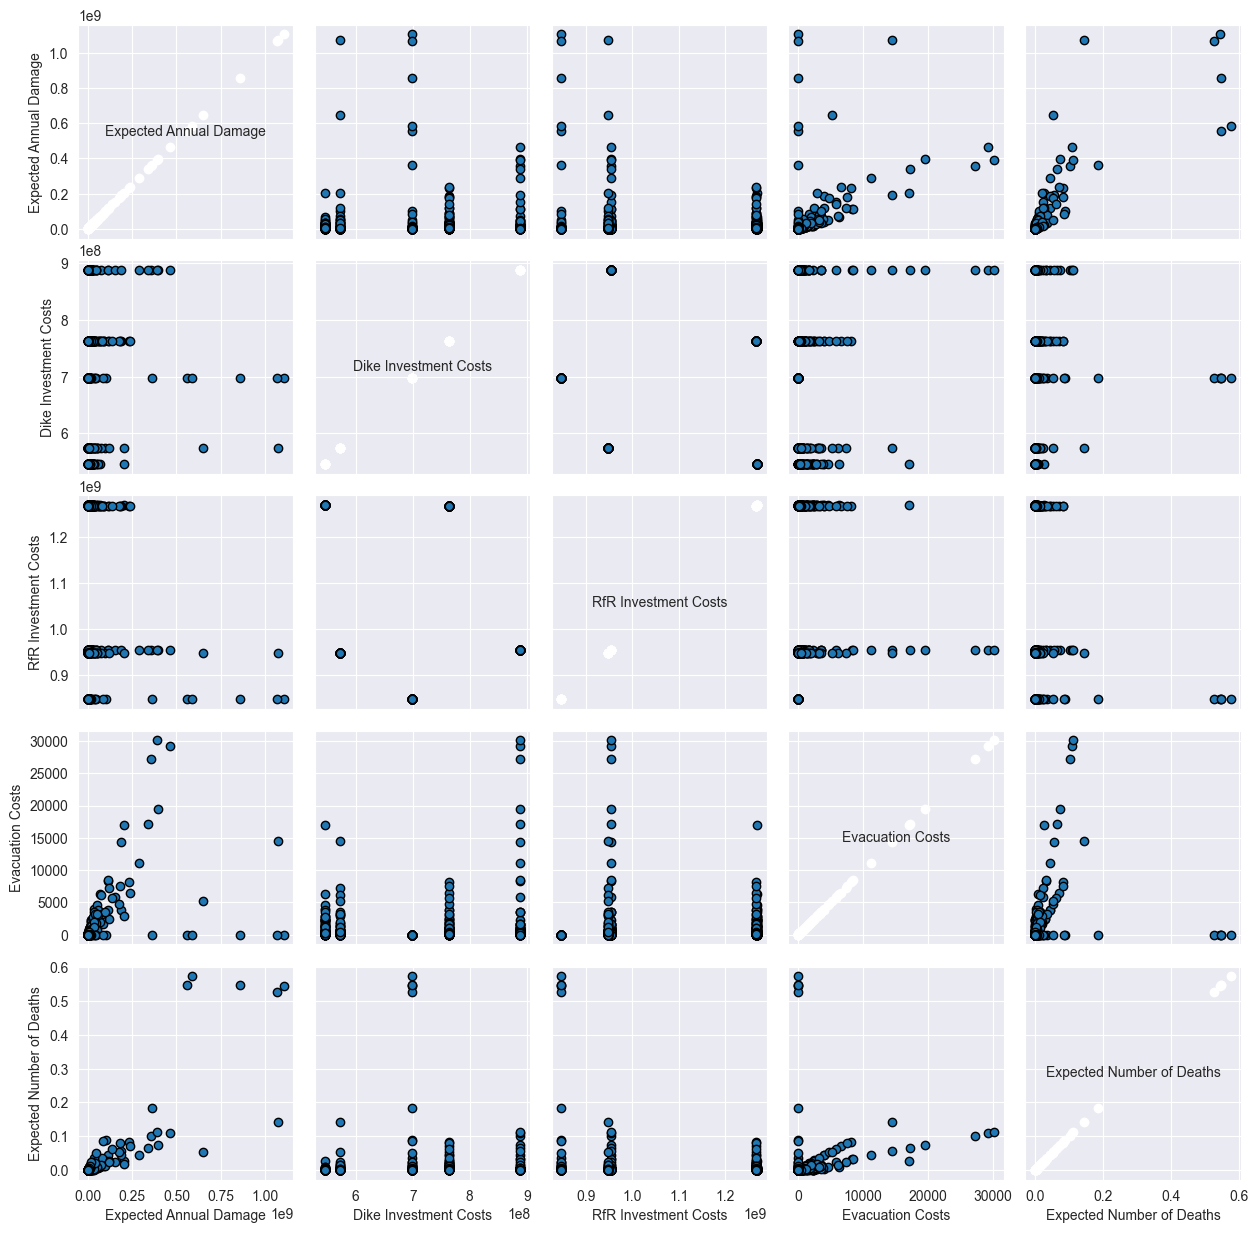

In [3]:
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

Interpretation of figure: There is a small trade-off between evacuation costs and expected annual damage

## Scenario discovery

In [214]:
experiments, outcomes = load_results('./results/prim_problem3c.tar.gz')

In [215]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,25,267.321053,10.0,0.175189,91.013567,1.0,0.119970,106.665642,1.5,0.737102,...,0,0,0,0,0,0,0,0,Policy 0,dikesnet
1,31,293.081528,10.0,0.392882,348.075206,1.0,0.658649,182.698136,1.0,0.314627,...,0,0,0,0,0,0,0,1,Policy 0,dikesnet
2,105,158.533238,10.0,0.537359,315.145762,1.0,0.343249,290.983221,1.0,0.213538,...,0,0,0,0,0,0,0,2,Policy 0,dikesnet
3,54,201.693749,1.5,0.194148,32.885633,1.0,0.174704,80.246762,1.0,0.905294,...,0,0,0,0,0,0,0,3,Policy 0,dikesnet
4,120,114.132009,1.5,0.133449,283.273199,1.0,0.205820,208.792280,1.0,0.963628,...,0,0,0,0,0,0,0,4,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7,214.350166,10.0,0.476040,56.400380,1.0,0.254759,342.798011,1.0,0.005934,...,0,0,0,0,0,0,0,4995,Policy 0,dikesnet
4996,97,154.768345,1.0,0.401215,80.807018,1.5,0.285847,149.349729,1.5,0.660685,...,0,0,0,0,0,0,0,4996,Policy 0,dikesnet
4997,81,222.330591,1.5,0.479747,325.922066,1.5,0.195278,116.335883,1.5,0.105879,...,0,0,0,0,0,0,0,4997,Policy 0,dikesnet
4998,41,261.976914,1.0,0.916810,168.733061,10.0,0.419115,87.043957,1.5,0.915642,...,0,0,0,0,0,0,0,4998,Policy 0,dikesnet


In [216]:
# clean up experiments
X = experiments.iloc[:, 0:(len(experiments.columns)-3)]

In [217]:
outcomes.keys()

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])

In [224]:
# Define outcome to study 
outcome_to_study = 'A.1 Total Costs'
# Define number of cases to study
percentile = 85

In [225]:
# Calculate the threshold
threshold = np.percentile(outcomes[outcome_to_study], percentile) 
# Show threshold
print(f"The threshold for {percentile}% worst outcomes for {outcome_to_study} equals {threshold}.")

The threshold for 85% worst outcomes for A.1 Total Costs equals 2026550162.603828.


In [207]:
# Get column to optimise
opt = outcomes[outcome_to_study]
# To dataframe
opt = pd.DataFrame(opt)

In [208]:
opt[outcome_to_study] = np.where(opt[0] > threshold, 1, 0)

In [209]:
y = opt[outcome_to_study].to_numpy()

In [210]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [211]:
# Define PRIM
sd_alg = prim.Prim(x=X, y=y, threshold=0.8, peel_alpha=0.1)

AttributeError: 'function' object has no attribute 'Prim'

In [186]:
box = sd_alg.find_box()

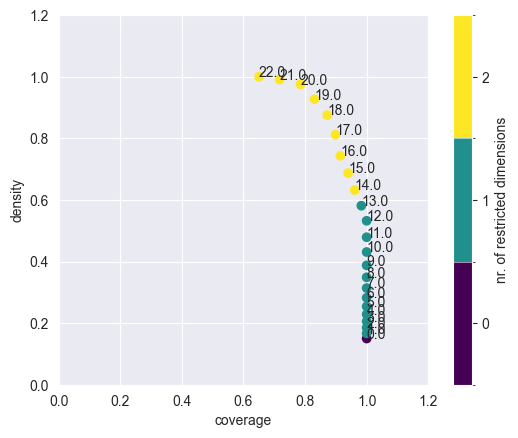

In [187]:
box.show_tradeoff(annotated=True)
plt.show()

In [188]:
point_to_study = 17

In [189]:
box.inspect(point_to_study)

coverage      0.898667
density       0.812048
id           17.000000
k           674.000000
mass          0.166000
mean          0.812048
n           830.000000
res_dim       2.000000
Name: 17, dtype: float64

             box 17                                 
                min       max      qp value qp value
A.2_pfail  0.000084  0.206474           NaN      0.0
A.1_pfail  0.182601  0.999857  6.922219e-17      NaN



[None]

[<Figure size 640x480 with 1 Axes>]

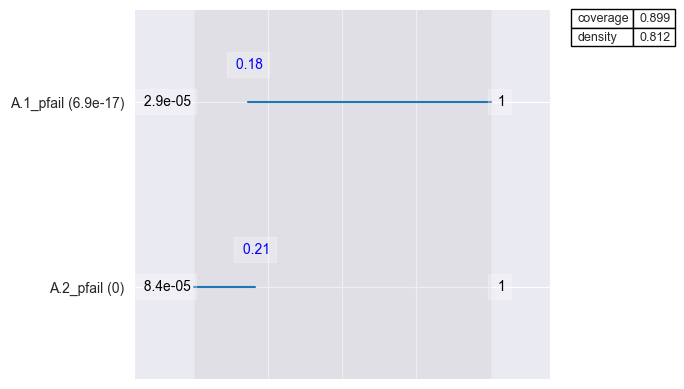

In [190]:
box.inspect(point_to_study, style='graph')

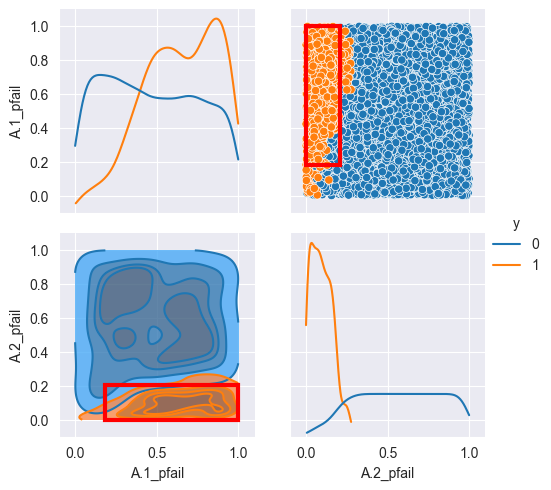

In [191]:
box.show_pairs_scatter(point_to_study)
plt.show()